<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

(400, 4096)


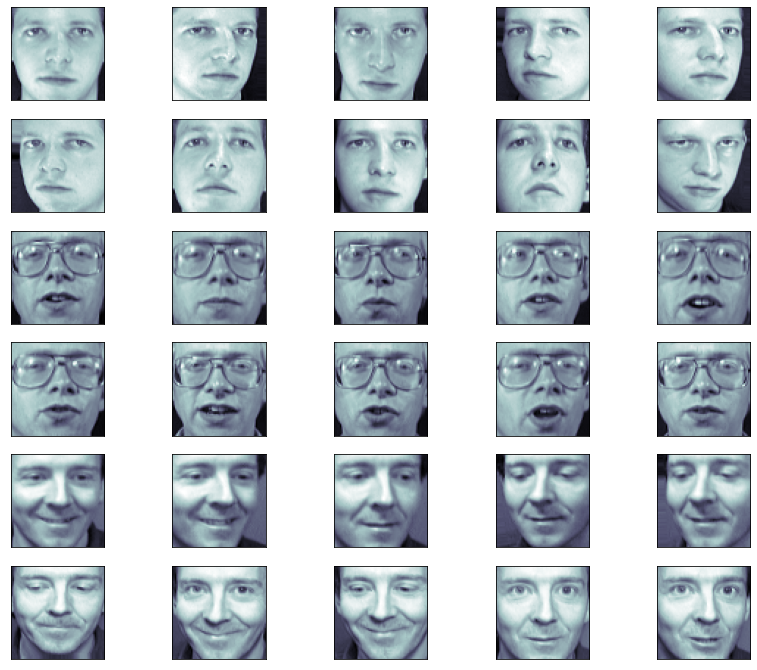

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.linalg import *
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()
print(faces.data.shape)
fig = plt.figure(figsize=(14, 12))
# plot some images
for i in range(30):
    ax = fig.add_subplot(6, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data,
        faces.target, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


In [3]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=150, whiten=True)
pca.fit(X_train)
print(pca)

PCA(n_components=150, whiten=True)


In [5]:
def normalize(column):
    mean_column = np.sum(column,axis=0)/column.shape[0]
    std_column = np.std(column)
    z = (column-mean_column)/(std_column)
    return z

normalized = np.zeros((X_train.shape[0],X_train.shape[1]))
for i in range(X_train.shape[1]):
    z = normalize(X_train[0:,i])
    normalized[0:,i] = z
covariance = np.dot(normalized.T,normalized)/X_train.shape[0]
eigenValues, eigenVectors = np.linalg.eig(covariance)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
eig_vectors = eigenVectors[0:,0:150]
reduction = normalized@eig_vectors
print(reduction)

[[-10.05457085+0.j  -9.67818536+0.j -38.21033984+0.j ...  -1.06375055+0.j
   -1.48102992+0.j  -0.18008031+0.j]
 [ 26.81762193+0.j  21.76825592+0.j   0.23155557+0.j ...   1.89624268+0.j
    0.24760214+0.j  -0.12378542+0.j]
 [  8.25781577+0.j -27.00054501+0.j   4.85659492+0.j ...  -2.01675673+0.j
   -0.66752143+0.j   2.05034944+0.j]
 ...
 [ 24.6217085 +0.j -12.06254062+0.j -35.15783424+0.j ...   0.42916044+0.j
    0.40656739+0.j   0.9934878 +0.j]
 [ 15.85594635+0.j  24.24395264+0.j -17.90055265+0.j ...  -0.65587886+0.j
    0.69218862+0.j   0.86157499+0.j]
 [ 32.58081072+0.j  13.06969541+0.j   4.32383455+0.j ...   0.85966215+0.j
    3.21149845+0.j  -0.38815981+0.j]]


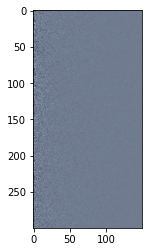

In [6]:
plt.imshow(reduction.real,cmap=plt.cm.bone)
plt.show()

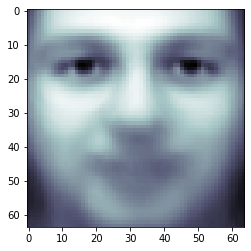

In [7]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape), cmap=plt.cm.bone)
plt.show()

In [8]:
print(pca.components_.shape)

(150, 4096)


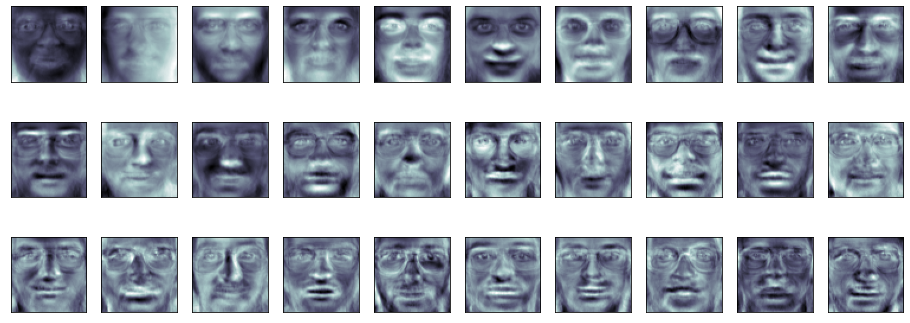

In [9]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),cmap=plt.cm.bone)

In [10]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 150)
(100, 150)


# Do classification via Support Vector Machines


In [11]:
from sklearn import svm
clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)

SVC(C=5.0, gamma=0.001)

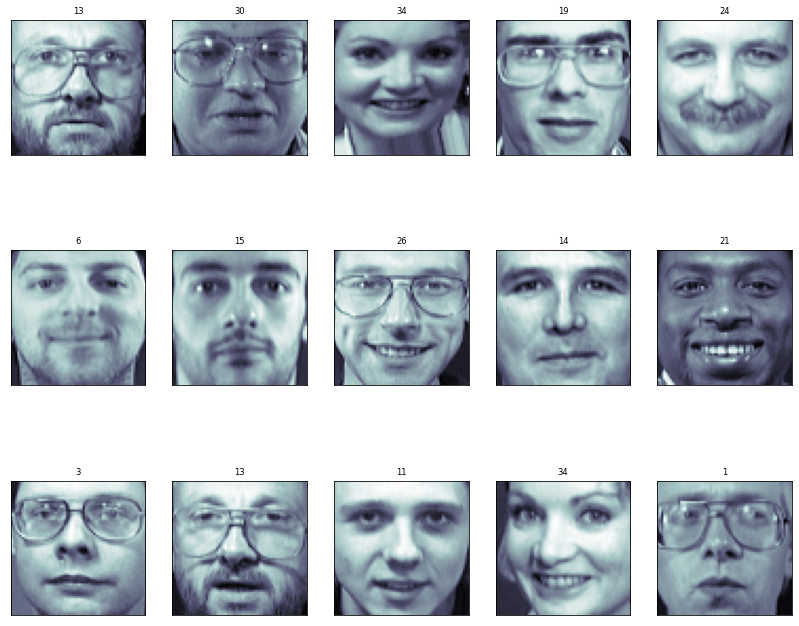

In [12]:
fig = plt.figure(figsize=(14, 12))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)
    y_pred = clf.predict(X_test_pca[i, np.newaxis])[0]
    color = ('black' if y_pred == y_test[i] else 'red')
    ax.set_title(y_pred, fontsize='small', color=color)

In [13]:
from sklearn import metrics
y_pred = clf.predict(X_test_pca)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      1.00      1.00         4
           2       0.50      1.00      0.67         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         6
          19       1.00      1.00      1.00         4
          20       1.00    

In [14]:
print(metrics.confusion_matrix(y_test, y_pred))

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]


In [15]:
from sklearn.pipeline import Pipeline
clf = Pipeline([('pca', decomposition.PCA(n_components=150, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
plt.show()

[[3 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 3]]
